# Destination's arcs infrastructure analysis

This code allows you to estimate the followgin variables related to the origin's infrastructure. 
D_LCycle = Length of cycle paths (in kilometers) within a 600m buffer around the trip destination. 
D_Hls = High levels of stress. Length of major roads (in kilometers) within a 600m buffer around the trip destination.
D_Lls = Low levels of stress. Length of minor roads (in kilometers) within a 600m buffer around the trip destination.
D_l80 = Length of 80km/h roads (in kilometers) within a 600m buffer around the trip destination.
D_l60 = Length of 60km/h roads (in kilometers) within a 600m buffer around the trip destination.
D_l40 = Length of 40km/h roads (in kilometers) within a 600m buffer around the trip destination.
D_l30 = Length of 30km/h roads (in kilometers) within a 600m buffer around the trip destination.
D_l5 = Length of 5km/h roads (in kilometers) within a 600m buffer around the trip destination.

All the arcs related to each origin are assumed to be previously estimated. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import csv
import math

print ("it works")

it works


### Example for only one route 

In [2]:
route = 1002
db = gpd.read_file('../Shapes/end_arcs600/R' +"%s" % (route) +'_end_arcs600.shp')
print (db.crs)
db.head()

{'init': 'epsg:3116'}


,OBJECTID,bridge,from_,highway,name,oneway,osmid,to,ID_PhD,Cyclypath,...,vc80,vc60,vc40,vc30,vc5,Hle,Lle,bnocycle,bcycle,geometry
0,33667,None,1814542378,primary,Avenida del Ferrocarril,True,30658250,339054018,33667,0,...,0,128,0.0,0,0,128.229791,0,1,0,"LINESTRING Z (834243.8059 1182094.069399999 0,..."
1,33668,None,339054018,primary,Avenida del Ferrocarril,True,30658250,339054019,33668,0,...,0,55,0.0,0,0,54.695307,0,1,0,LINESTRING Z (834247.8344000001 1182222.217499...
2,30296,None,850874115,unclassified,None,True,71527050,2671726867,30296,0,...,0,0,0.0,0,0,0.000000,0,1,0,LINESTRING Z (833731.2880999995 1181950.7304 0...
3,30299,None,850874117,residential,Carrera 63A,False,261576278,1816091548,30299,0,...,0,0,0.0,279,0,0.000000,279,1,0,LINESTRING Z (833749.7937000003 1181922.180500...
4,38577,None,None,footway,None,None,None,None,38577,0,...,0,0,0.0,0,53,0.000000,53,1,0,LINESTRING Z (834324.8823999995 1182389.5297 0...


In [3]:
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 46 columns):
OBJECTID      307 non-null int64
bridge        13 non-null object
from_         304 non-null object
highway       307 non-null object
name          227 non-null object
oneway        302 non-null object
osmid         302 non-null object
to            304 non-null object
ID_PhD        307 non-null object
Cyclypath     307 non-null int64
Ped_path      307 non-null int64
X_from        307 non-null float64
Y_from        307 non-null float64
Z_from        307 non-null float64
X_to          307 non-null float64
Y_to          307 non-null float64
Z_to          307 non-null float64
slope         307 non-null float64
speed         307 non-null float64
v_80          307 non-null float64
v_60          307 non-null float64
v_40          307 non-null float64
v_30          307 non-null float64
v_5           307 non-null float64
Long          307 non-null float64
Cycle_long    307 non-null 

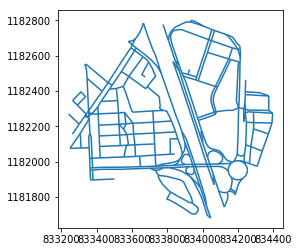

In [4]:
db.plot()

In [5]:
D_LCycle = (db['Cycle_long']).sum()/1000 
D_Hls = (db['Hle']).sum()/1000
D_Lls = (db['Lle']).sum()/1000
D_l80 = (db['vc80']).sum()/1000
D_l60 = (db['vc60']).sum()/1000
D_l40 = (db['vc40']).sum()/1000
D_l30 = (db['vc30']).sum()/1000
D_l5 = (db['vc5']).sum()/1000

In [6]:
print ("D_LCycle:" + str(D_LCycle))
print ("D_l80:" + str(D_l80))
print ("D_l60:" + str(D_l60))
print ("D_l40:" + str(D_l40))
print ("D_l30:" + str(D_l30))
print ("D_l5:" + str(D_l5))
print ("D_Hls:" + str(D_Hls))
print ("D_Lls:" + str(D_Lls))

D_LCycle:1.0252552940264
D_l80:4.905
D_l60:3.967
D_l40:4.348698211477
D_l30:8.378
D_l5:1.59
D_Hls:13.221454705805
D_Lls:9.968


In [7]:
results = pd.DataFrame ({
        "route":[route],
        "D_LCycle":[D_LCycle],
        "D_l80":[D_l80],
        "D_l60":[D_l60],
        "D_l40":[D_l40],
        "D_l30":[D_l30],
        "D_l5":[D_l5],
        "D_Hls":[D_Hls],
        "D_Lls":[D_Lls]})
results.to_csv('../Tables/OUT/R' +"%s" %(route)+'_end_infra600.txt',index=False, header=True)

### Destination's arcs infrastructure analysis for All routes 

The code requires the list of the destination points associated to all the routes. This list is located in the Tables folder. If you move this file out of this folder, please modify the code.   

In [8]:
routes = np.loadtxt('../Tables/Routes.txt',dtype='str')

In [20]:
for i in routes:
    db = gpd.read_file('../Shapes/end_arcs600/R' +"%s" % (i) +'_end_arcs600.shp')
    D_LCycle = (db['Cycle_long']).sum()/1000 
    D_Hls = (db['Hle']).sum()/1000
    D_Lls = (db['Lle']).sum()/1000
    D_l80 = (db['vc80']).sum()/1000
    D_l60 = (db['vc60']).sum()/1000
    D_l40 = (db['vc40']).sum()/1000
    D_l30 = (db['vc30']).sum()/1000
    D_l5 = (db['vc5']).sum()/1000
    
    results = pd.DataFrame ({
        "route":[i],
        "D_LCycle":[D_LCycle],
        "D_l80":[D_l80],
        "D_l60":[D_l60],
        "D_l40":[D_l40],
        "D_l30":[D_l30],
        "D_l5":[D_l5],
        "D_Hls":[D_Hls],
        "D_Lls":[D_Lls]})
    results.to_csv('../Tables/OUT/R' +"%s" %(i)+'_end_infra600.txt',index=False, header=True)

This part of the code summarizes the Destination's arcs infrastructure in only one table. Please copy it to a text file and save.

In [21]:
print 'route,D_LCycle,D_l80,D_l60,D_l40,D_l30,D_l5,D_Hls,D_Lls'
for i in routes:
    df=np.loadtxt('../Tables/OUT/R' +"%s" %(i)+'_end_infra600.txt', delimiter=',',skiprows=1)
    print ((df[0]),(df[1]),(df[2]),(df[3]),(df[4]),(df[5]),(df[6]),(df[7]),(df[8])) 

ruta,D_Lstreet,D_sttdens,D_LCycle,D_lv80,D_lv60,D_lv40,D_lv30,D_lv5,D_Hle,D_Lle
(1002.0, 24.733079128300002, 21.8688433397, 1.0252552940299999, 4.0, 3.0, 4.3486982114800004, 8.0, 1.0, 13.221454705799999, 9.0)
(1006.0, 26.140168619699999, 23.112983606, 0.80371431580700003, 0.0, 6.0, 10.168253566000001, 6.0, 1.0, 16.857681314600001, 8.0)
(1009.0, 16.6601374171, 14.7307956807, 0.76029956014599998, 0.0, 5.0, 4.6109700806999996, 4.0, 0.0, 10.7887781671, 4.0)
(1013.0, 5.5899901986499998, 4.9426365108299999, 0.0, 0.0, 0.0, 0.91389098586999995, 2.0, 0.0, 2.1992787517400001, 2.0)
(10291.0, 22.200267647899999, 19.6293463007, 1.0521797714200001, 0.0, 3.0, 8.9475452858699995, 5.0, 2.0, 12.879885378299999, 7.0)
(10292.0, 14.4400235517, 12.7677840367, 0.0, 0.0, 3.0, 5.1324856480300003, 5.0, 0.0, 8.7505945098600009, 5.0)
(1050.0, 16.935722740999999, 14.9744666059, 0.0, 0.0, 0.0, 4.4112229913699998, 9.0, 2.0, 4.4112229913699998, 12.0)
(1052.0, 21.618809667099999, 19.115224568199999, 1.44821301583, 4.0